In [1]:
from src import Processor, Reader

In [2]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = south_atlantic_states

In [33]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

In [34]:
state_code_map.head()

,code,state_name
0,10,Delware
1,11,DC
2,12,Florida
3,13,Georgia
4,24,Maryland


## Loading data

In [3]:
# Instantiate preprocessor
preprocessor = Processor.PreProcessor(state_filter=state_filter)

In [4]:
# Loading the data WITHOUT FIPs codes, Months, and State turned into boolean columns, use this:
preprocessor.load_processed_data_without_fips_as_columns()

/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])
/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])


In [5]:
# Load processed data with FIPS codes turned into boolean columns
# preprocessor.load_processed_data()

In [6]:
# Put data into a df to work with
df = preprocessor.get_current_data()

In [7]:
df.head()

,gathering_ban_order_group_ban_gatherings_of_any_size,gathering_ban_order_group_ban_over_101_or_more_ppl,gathering_ban_order_group_ban_over_11_to_25_ppl,gathering_ban_order_group_ban_over_1_to_10_ppl,gathering_ban_order_group_ban_over_26_to_50_ppl,gathering_ban_order_group_ban_over_51_to_100_ppl,gathering_ban_order_group_no_order_found,gathering_ban_express_preemption_Expressly Preempts,gathering_ban_express_preemption_Expressly Preempts Less Restrictive Measures,gathering_ban_express_preemption_Unknown,...,restuarants_limited_open_general_indoor_nan,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,is_metro,Series_Complete_Pop_Pct_UR_Equity,cases,deaths,month,days_from_start,STATE
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,230.0,3.0,April,0,10
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,255.0,4.0,April,1,10
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,281.0,4.0,April,2,10
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,288.0,6.0,April,3,10
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,329.0,7.0,April,4,10


In [8]:
df.shape

(289884, 93)

## Data Viz

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
sns.set()

In [10]:
# Scatterplot of cases over time
# Scatterplot of deaths over time

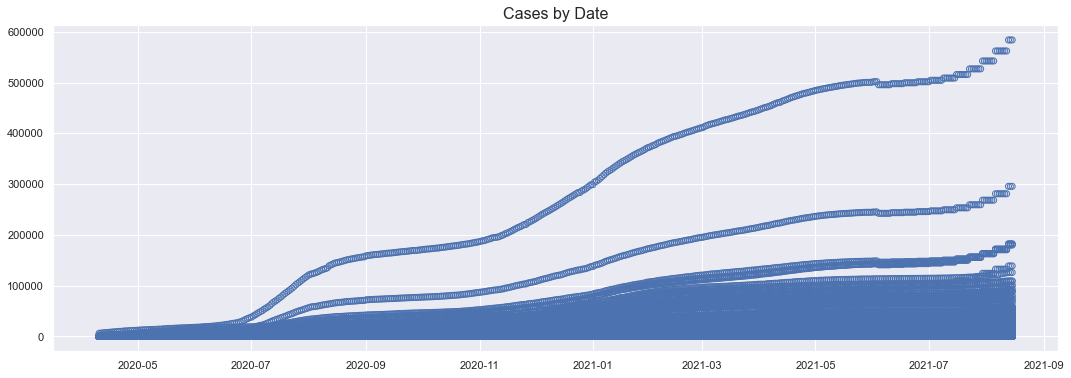

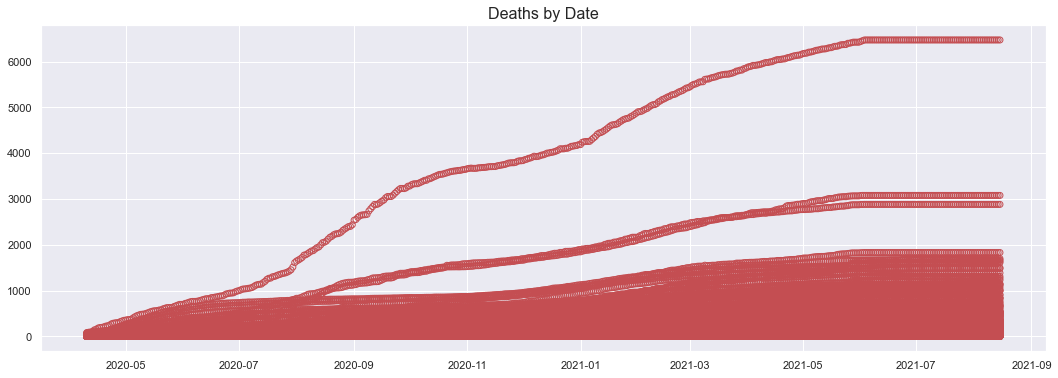

In [11]:
# Looking at each target variable based on day:
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='cases', data=df, color='none', edgecolor='b')
plt.title('Cases by Date', fontsize=16);
plt.show()
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='deaths', data=df, color='none', edgecolor='r')
plt.title('Deaths by Date', fontsize=16);
plt.show()

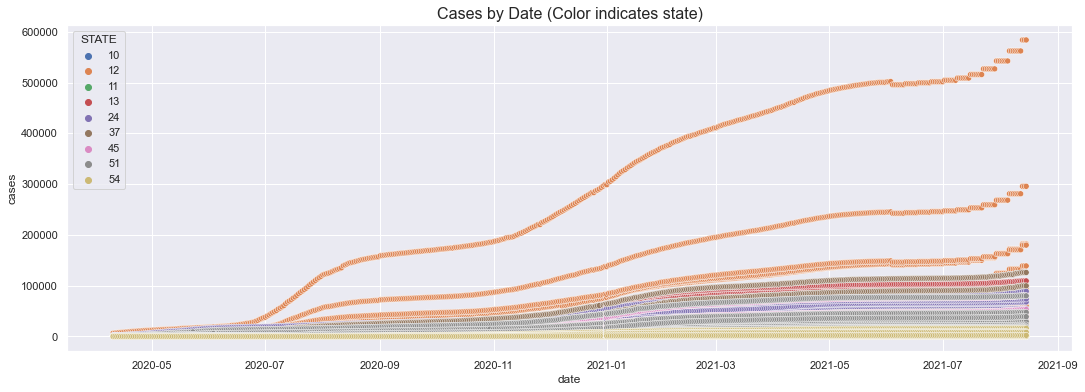

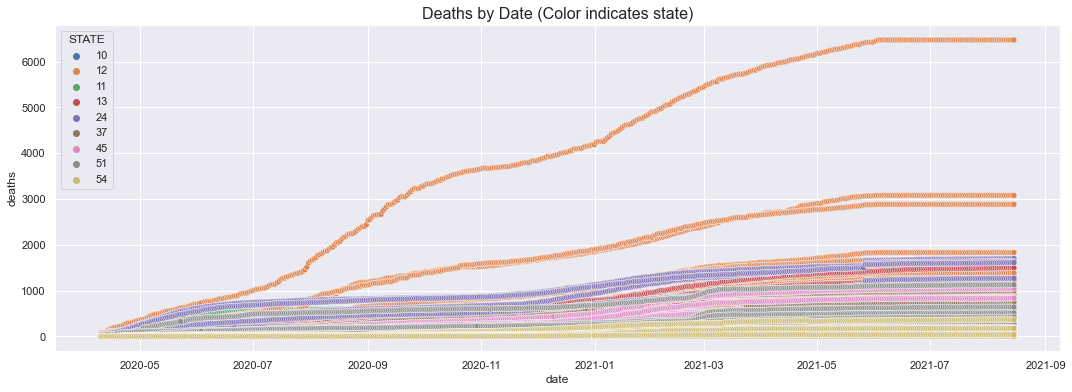

In [19]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases', hue='STATE', data=df);
plt.title('Cases by Date (Color indicates state)', fontsize=16);
plt.show()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', hue='STATE', data=df);
plt.title('Deaths by Date (Color indicates state)', fontsize=16);
plt.show()

In [35]:
# Create df grouped by state and graph
state_df = df[['date', 'STATE', 'cases', 'deaths']].groupby(['date','STATE']).sum().reset_index()
state_df = state_df.merge(state_code_map, how='inner', left_on=['STATE'], right_on=['code'])
state_df.head()

,date,STATE,cases,deaths,code,state_name
0,2020-04-10,10,1317.0,32.0,10,Delware
1,2020-04-11,10,1466.0,33.0,10,Delware
2,2020-04-12,10,1625.0,35.0,10,Delware
3,2020-04-13,10,1758.0,41.0,10,Delware
4,2020-04-14,10,1915.0,43.0,10,Delware


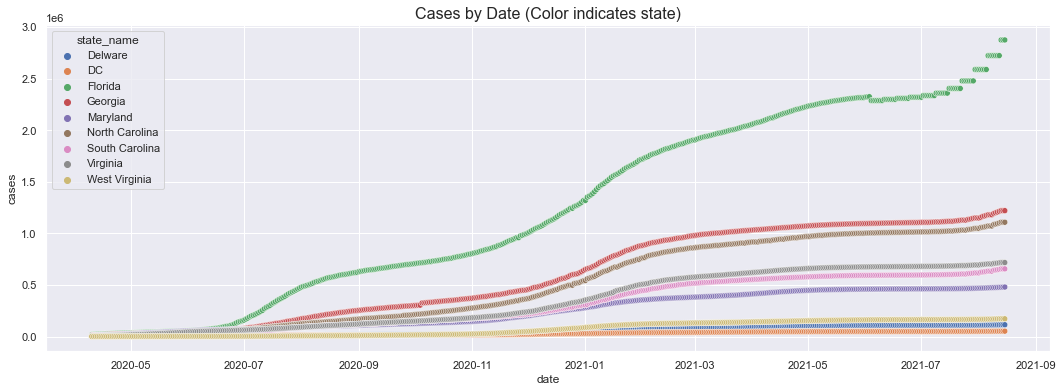

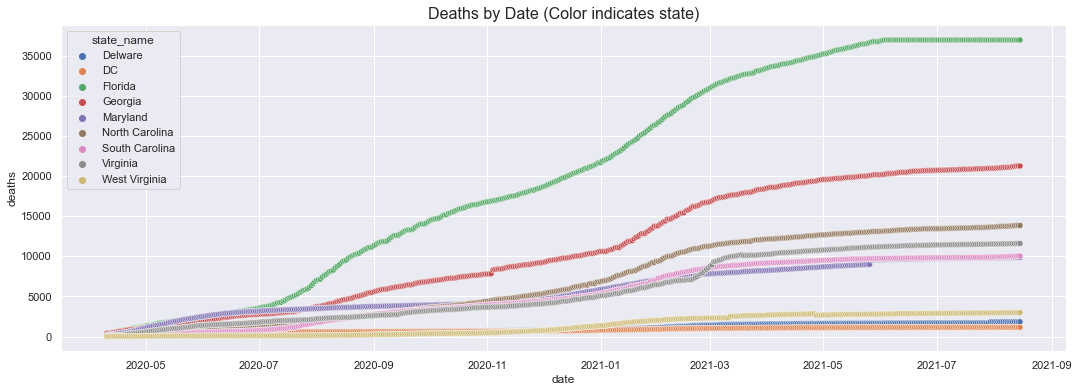

In [36]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases', hue='state_name', data=state_df);
plt.title('Cases by Date (Color indicates state)', fontsize=16);
plt.show()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', hue='state_name', data=state_df);
plt.title('Deaths by Date (Color indicates state)', fontsize=16);
plt.show()

In [48]:
# It looks like all of this data might be cumulative... What does the pattern look like when we treat it that way?
state_df['previous_day_cases'] = state_df['cases'].shift(periods=1)
state_df['new_case_count'] = state_df['cases'] - state_df['previous_day_cases']
state_df['new_case_count'] = state_df['new_case_count'].apply(lambda x: max(0, x))

In [49]:
state_df.head(10)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count
0,2020-04-10,10,1317.0,32.0,10,Delware,NaN,0.0
1,2020-04-11,10,1466.0,33.0,10,Delware,1317.0,149.0
2,2020-04-12,10,1625.0,35.0,10,Delware,1466.0,159.0
3,2020-04-13,10,1758.0,41.0,10,Delware,1625.0,133.0
4,2020-04-14,10,1915.0,43.0,10,Delware,1758.0,157.0
5,2020-04-15,10,1997.0,46.0,10,Delware,1915.0,82.0
6,2020-04-16,10,2053.0,52.0,10,Delware,1997.0,56.0
7,2020-04-17,10,2295.0,61.0,10,Delware,2053.0,242.0
8,2020-04-18,10,2508.0,67.0,10,Delware,2295.0,213.0
9,2020-04-19,10,2508.0,67.0,10,Delware,2508.0,0.0


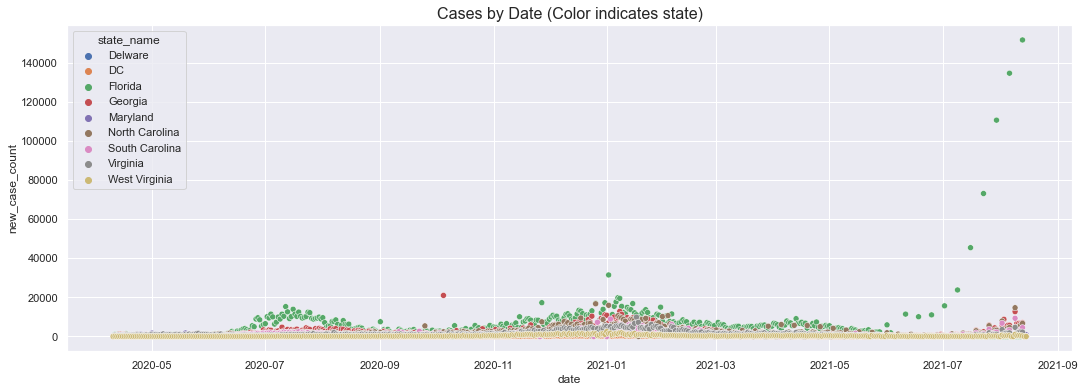

In [51]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_case_count', hue='state_name', data=state_df);
plt.title('Cases by Date (Color indicates state)', fontsize=16);
plt.show()

In [55]:
state_df[state_df['state_name'] == 'Florida'].tail(100)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count
1379,2021-05-08,12,2263273.0,35699.0,12,Florida,2259289.0,3984.0
1380,2021-05-09,12,2266549.0,35730.0,12,Florida,2263273.0,3276.0
1381,2021-05-10,12,2268857.0,35782.0,12,Florida,2266549.0,2308.0
1382,2021-05-11,12,2272128.0,35830.0,12,Florida,2268857.0,3271.0
1383,2021-05-12,12,2275348.0,35881.0,12,Florida,2272128.0,3220.0
...,...,...,...,...,...,...,...,...
1474,2021-08-11,12,2725448.0,36973.0,12,Florida,2725448.0,0.0
1475,2021-08-12,12,2725448.0,36973.0,12,Florida,2725448.0,0.0
1476,2021-08-13,12,2877213.0,36973.0,12,Florida,2725448.0,151765.0
1477,2021-08-14,12,2877213.0,36973.0,12,Florida,2877213.0,0.0


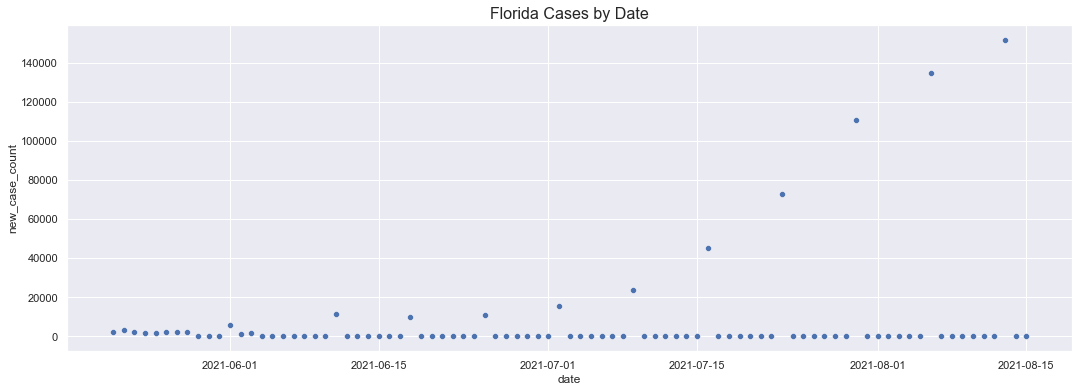

In [129]:
# It looks like FL has transitioned to only reporting data once a week. 
# This will mess up our predictions since there will an artificially high jump between days on the date
# That they update the numbers
florida_last100 = state_df[((state_df['state_name'] == 'Florida') & (state_df['date'] > datetime.strptime('2021-05-20', '%Y-%m-%d')))].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_case_count', data=florida_last100);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

In [130]:
florida_last100.head(25)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count
1392,2021-05-21,12,2301727.0,36440.0,12,Florida,2299347.0,2380.0
1393,2021-05-22,12,2305149.0,36462.0,12,Florida,2301727.0,3422.0
1394,2021-05-23,12,2307268.0,36473.0,12,Florida,2305149.0,2119.0
1395,2021-05-24,12,2308873.0,36500.0,12,Florida,2307268.0,1605.0
1396,2021-05-25,12,2310750.0,36580.0,12,Florida,2308873.0,1877.0
1397,2021-05-26,12,2313085.0,36646.0,12,Florida,2310750.0,2335.0
1398,2021-05-27,12,2315431.0,36732.0,12,Florida,2313085.0,2346.0
1399,2021-05-28,12,2317776.0,36773.0,12,Florida,2315431.0,2345.0
1400,2021-05-29,12,2317776.0,36773.0,12,Florida,2317776.0,0.0
1401,2021-05-30,12,2317776.0,36773.0,12,Florida,2317776.0,0.0


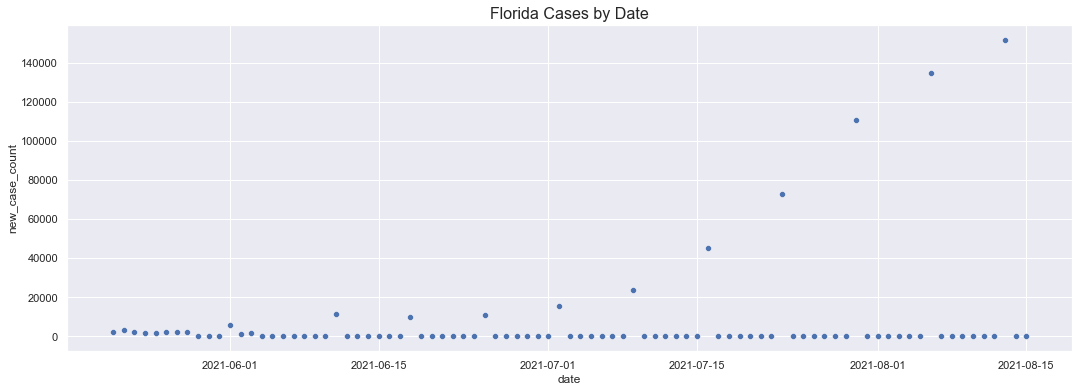

In [150]:
# It looks like FL has transitioned to only reporting data once a week. 
# This will mess up our predictions since there will an artificially high jump between days on the date
# That they update the numbers
florida = state_df[(state_df['state_name'] == 'Florida')].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_case_count', data=florida_last100);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

In [132]:
state_df[state_df['previous_day_cases'].isna()]['date'].drop_duplicates()

0   2020-04-10
Name: date, dtype: datetime64[ns]

In [133]:
new_cases = florida_last100['new_case_count'].values

In [134]:
x = np.repeat(1, 3)
x

array([1, 1, 1])

In [135]:
list(x.reshape(-1, 1))

[array([1]), array([1]), array([1])]

In [136]:
y = []

In [137]:
y.append(x)

In [138]:
y

[array([1, 1, 1])]

In [139]:
most_recent_no = 0
count_since_last_no = 0
in_zero_count = False
result = []
for i, day_x in zip(range(0, len(new_cases)), new_cases):
    if i == len(new_cases) - 1: # Last value
        if day_x == 0:
            result += [v for v in np.repeat(0, count_since_last_no + 1)] # Just append 0s
    if day_x == 0: # New cases = 0
        count_since_last_no += 1
        in_zero_count = True
    else: # New cases != 0
        if count_since_last_no > 0: # If the prior new case counts are 0
            spread_out_value = (day_x - most_recent_no)/count_since_last_no # PBed count no
            # Create an array of spread out values:
            result += [v for v in np.repeat(spread_out_value, count_since_last_no + 1)]
        else:
            result.append(day_x)
        most_recent_no = day_x
        count_since_last_no = 0
            
  
    

In [140]:
florida_last100.head(15)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count
1392,2021-05-21,12,2301727.0,36440.0,12,Florida,2299347.0,2380.0
1393,2021-05-22,12,2305149.0,36462.0,12,Florida,2301727.0,3422.0
1394,2021-05-23,12,2307268.0,36473.0,12,Florida,2305149.0,2119.0
1395,2021-05-24,12,2308873.0,36500.0,12,Florida,2307268.0,1605.0
1396,2021-05-25,12,2310750.0,36580.0,12,Florida,2308873.0,1877.0
1397,2021-05-26,12,2313085.0,36646.0,12,Florida,2310750.0,2335.0
1398,2021-05-27,12,2315431.0,36732.0,12,Florida,2313085.0,2346.0
1399,2021-05-28,12,2317776.0,36773.0,12,Florida,2315431.0,2345.0
1400,2021-05-29,12,2317776.0,36773.0,12,Florida,2317776.0,0.0
1401,2021-05-30,12,2317776.0,36773.0,12,Florida,2317776.0,0.0


In [141]:
result[:15]

[2380.0,
 3422.0,
 2119.0,
 1605.0,
 1877.0,
 2335.0,
 2346.0,
 2345.0,
 1198.3333333333333,
 1198.3333333333333,
 1198.3333333333333,
 1198.3333333333333,
 1238.0,
 1888.0,
 1366.142857142857]

In [142]:
florida_last100['test'] = result

In [144]:
florida_last100.head(30)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count,test
1392,2021-05-21,12,2301727.0,36440.0,12,Florida,2299347.0,2380.0,2380.000000
1393,2021-05-22,12,2305149.0,36462.0,12,Florida,2301727.0,3422.0,3422.000000
1394,2021-05-23,12,2307268.0,36473.0,12,Florida,2305149.0,2119.0,2119.000000
1395,2021-05-24,12,2308873.0,36500.0,12,Florida,2307268.0,1605.0,1605.000000
1396,2021-05-25,12,2310750.0,36580.0,12,Florida,2308873.0,1877.0,1877.000000
1397,2021-05-26,12,2313085.0,36646.0,12,Florida,2310750.0,2335.0,2335.000000
1398,2021-05-27,12,2315431.0,36732.0,12,Florida,2313085.0,2346.0,2346.000000
1399,2021-05-28,12,2317776.0,36773.0,12,Florida,2315431.0,2345.0,2345.000000
1400,2021-05-29,12,2317776.0,36773.0,12,Florida,2317776.0,0.0,1198.333333
1401,2021-05-30,12,2317776.0,36773.0,12,Florida,2317776.0,0.0,1198.333333


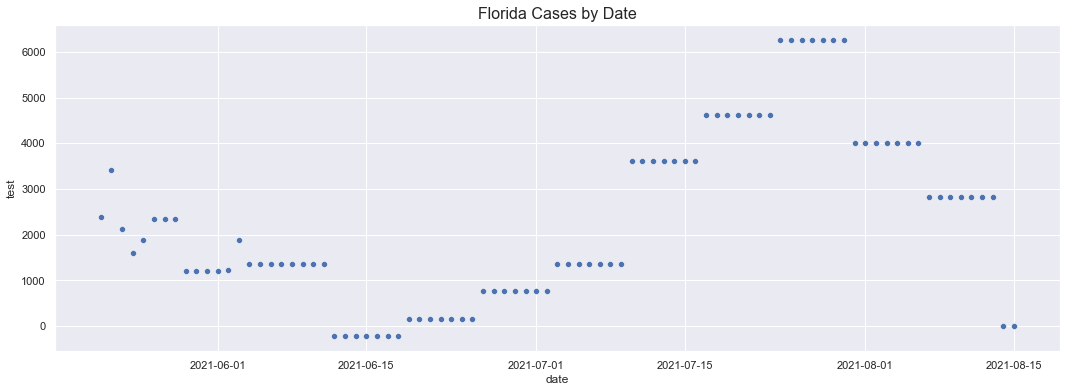

In [147]:
# It looks like FL has transitioned to only reporting data once a week. 
# This will mess up our predictions since there will an artificially high jump between days on the date
# That they update the numbers
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='test', data=florida_last100);
#sns.scatterplot(x='date', y='new_case_count', data=florida_last100);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

In [155]:
new_cases = florida['new_case_count'].values
most_recent_no = 0
count_since_last_no = 0
result = []
for i, day_x in zip(range(0, len(new_cases)), new_cases):
    if day_x == 0: # New cases = 0
        if i == len(new_cases) - 1: # Last value
            result += [v for v in np.repeat(0, count_since_last_no + 1)] # Just append 0s
        else: 
            count_since_last_no += 1
    else: # New cases != 0
        if count_since_last_no > 0: # If the prior new case counts are 0
            spread_out_value = (day_x - most_recent_no)/count_since_last_no # PBed count no
            # Create an array of spread out values:
            result += [v for v in np.repeat(spread_out_value, count_since_last_no + 1)]
        else:
            result.append(day_x)
        most_recent_no = day_x
        count_since_last_no = 0

florida['test'] = result

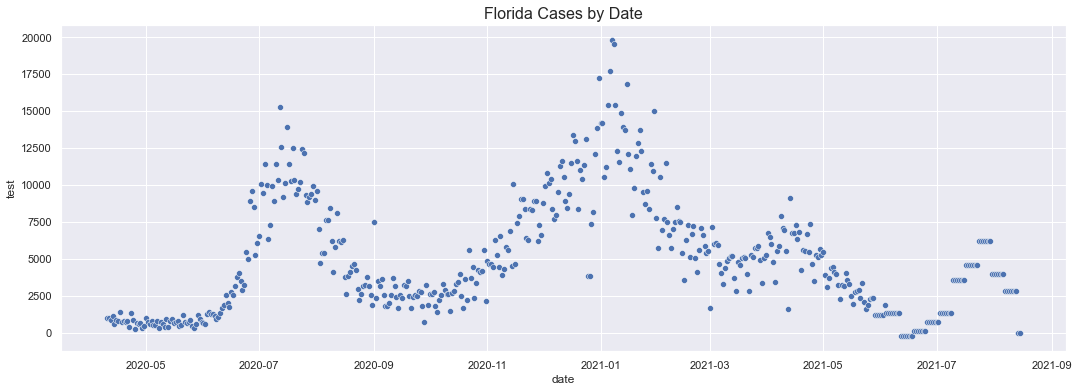

In [156]:
# Using "spread out" daily case numbers
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='test', data=florida);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

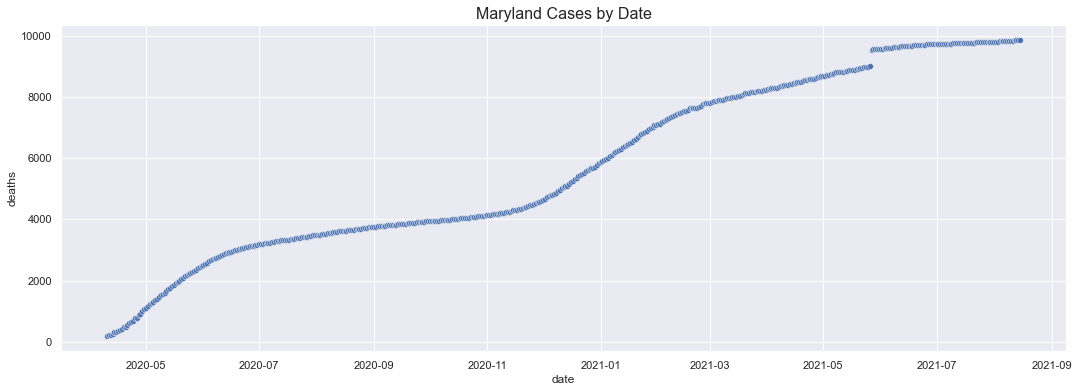

In [160]:
maryland = state_df[(state_df['state_name'] == 'Maryland')].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', data=maryland);
plt.title('Maryland Deaths by Date', fontsize=16);
plt.show()

In [162]:
maryland[(maryland['date'] > datetime.strptime('2021-05-10', '%Y-%m-%d'))].head(40)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count
2368,2021-05-11,24,453991.0,8810.0,24,Maryland,453592.0,399.0
2369,2021-05-12,24,454462.0,8828.0,24,Maryland,453991.0,471.0
2370,2021-05-13,24,454936.0,8840.0,24,Maryland,454462.0,474.0
2371,2021-05-14,24,455448.0,8852.0,24,Maryland,454936.0,512.0
2372,2021-05-15,24,455827.0,8870.0,24,Maryland,455448.0,379.0
2373,2021-05-16,24,456196.0,8876.0,24,Maryland,455827.0,369.0
2374,2021-05-17,24,456408.0,8878.0,24,Maryland,456196.0,212.0
2375,2021-05-18,24,456619.0,8894.0,24,Maryland,456408.0,211.0
2376,2021-05-19,24,456956.0,8907.0,24,Maryland,456619.0,337.0
2377,2021-05-20,24,457275.0,8913.0,24,Maryland,456956.0,319.0


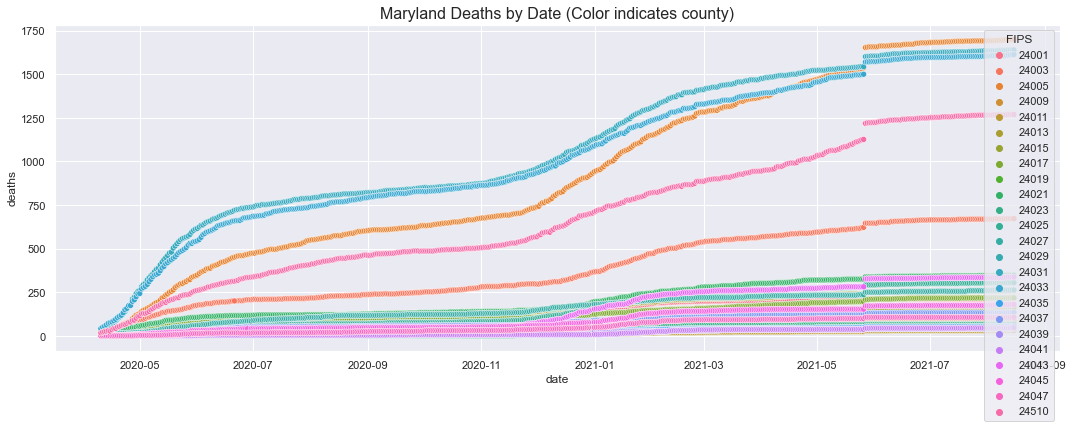

In [164]:
maryland_counties = df[(df['STATE'] == '24')].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', hue='FIPS', data=maryland_counties);
plt.title('Maryland Deaths by Date (Color indicates county)', fontsize=16);
plt.show()